In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\train.csv")  
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Clean the dataset
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True)

In [6]:
# Check for missing values
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

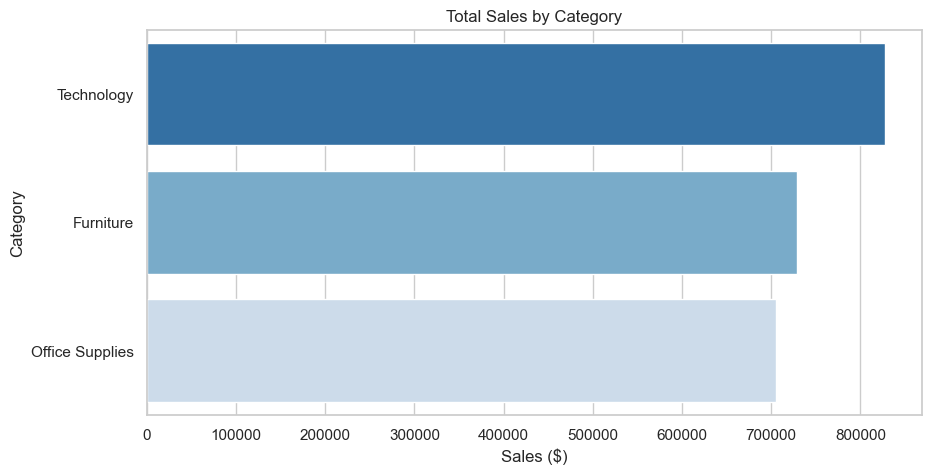

In [10]:
#sales by category
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

sns.barplot(x=category_sales.values, y=category_sales.index, palette='Blues_r')
plt.title("Total Sales by Category")
plt.xlabel("Sales ($)")
plt.ylabel("Category")
plt.show()

Sales by Category – Key Insights

<li>Technology leads in sales – high demand and high-value items.</li>
<li>Furniture has moderate sales – room for growth.</li>
<li>Office Supplies has lowest sales – frequent but low-value purchases.</li>

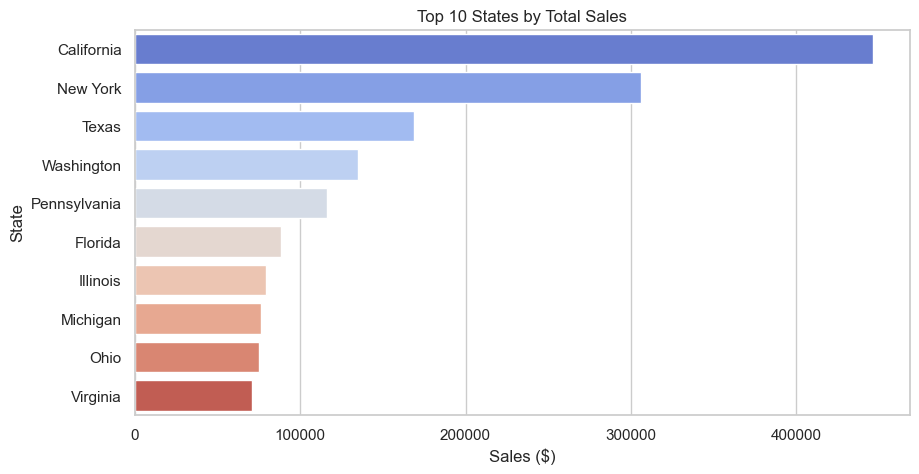

In [11]:
#"Top 10 States by Total Sales
top_states = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')
plt.title("Top 10 States by Total Sales")
plt.xlabel("Sales ($)")
plt.ylabel("State")
plt.show()

Top 10 States by Sales – Key Insights

<li>California dominates sales by a large margin — it's the primary revenue driver.</li>
<li>New York, Texas, and Washington follow with strong performance.</li>
<li>Other top states (e.g., Michigan, Pennsylvania) contribute steadily but with lower volume.</li>

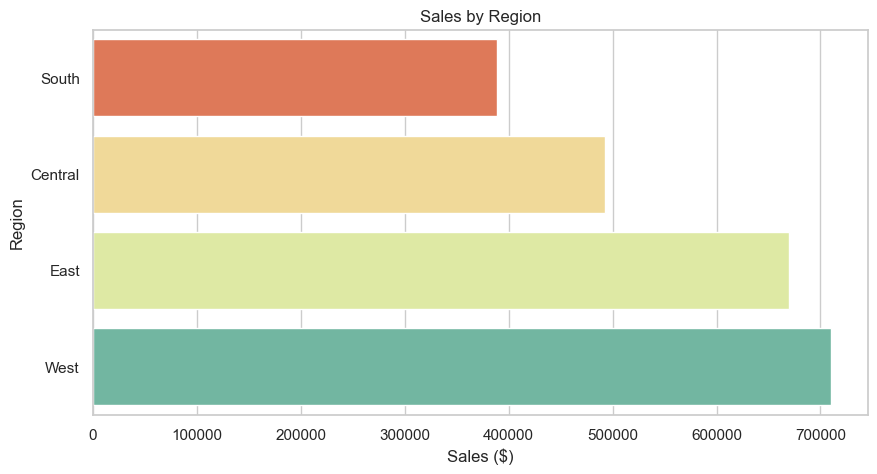

In [13]:
#Sales by Region
region_sales = df.groupby('region')['sales'].sum().sort_values()

sns.barplot(x=region_sales.values, y=region_sales.index, palette='Spectral')
plt.title("Sales by Region")
plt.xlabel("Sales ($)")
plt.ylabel("Region")
plt.show()

Sales by Region – Key Insights

<li>West region leads in total sales, followed by East.</li>
<li>Central and South regions have lower sales comparatively.</li>
<li>Strengthen marketing in Central and South to balance regional performance.</li>

<pre>📌<b> Summary:</b>

<li>Technology is the top-selling category.</li>
<li>California leads all states in total sales.</li>
<li>West region outperforms others in revenue.</li>
    
<b>Recommendation:</b> Boost marketing in underperforming regions and expand high-profit categories.</pre>